In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
import sys
import os
BASE_FOLDER = '/content/drive/My Drive/Colab Notebooks'
cd $BASE_FOLDER

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [3]:
import torch
import matplotlib.pyplot as plt #for plotting
import numpy as np
# modified from https://gist.github.com/kpierans/04b1303febbc4fa6c324ad41f4367c08

def compute_Mandelbrot(c=complex(-.1,.65), thresh=10, xrange=[-1.5,1.5], yrange=[-1.5,1.5], w = 2000, h = 1000, maxiter = 1000):
    
    #create mesh for 2D grid
    x = torch.linspace(xrange[0], xrange[1], w, dtype=torch.float).cuda().type(torch.half) 
    y = torch.linspace(yrange[0], yrange[1], h, dtype=torch.float).cuda().type(torch.half)         
    x, y = torch.meshgrid([x,y])

    julia_set = torch.zeros(w*h, dtype=torch.int64).reshape(w,h).cuda()
    
    
    for i in range(maxiter):
        x2 = x**2
        y2 = y**2     
        ids = (x2+y2) > thresh
        julia_set[ids] = i #iteration where cross threshold

        #z**2 + c = (zx+zyi)**2 + (cx+cyi) = (zx**2-zy**2 + cx) + (2*zx*zy + cy)i
        x_new = x2 - y2 + np.real(c) 
        y_new = 2*x*y + np.imag(c)
        x = x_new
        y = y_new

        if np.mod(i,500):
          print(i)
            
    return julia_set.t()

ModuleNotFoundError: No module named 'torch'

In [302]:
%time M = compute_Mandelbrot(c=complex(-.1,.65),thresh=10, xrange=[-1.5,1.5], yrange=[-1.5,1.5], w = 2000, h = 1000, maxiter = 10**4)

CPU times: user 8.32 s, sys: 3.78 s, total: 12.1 s
Wall time: 12.1 s


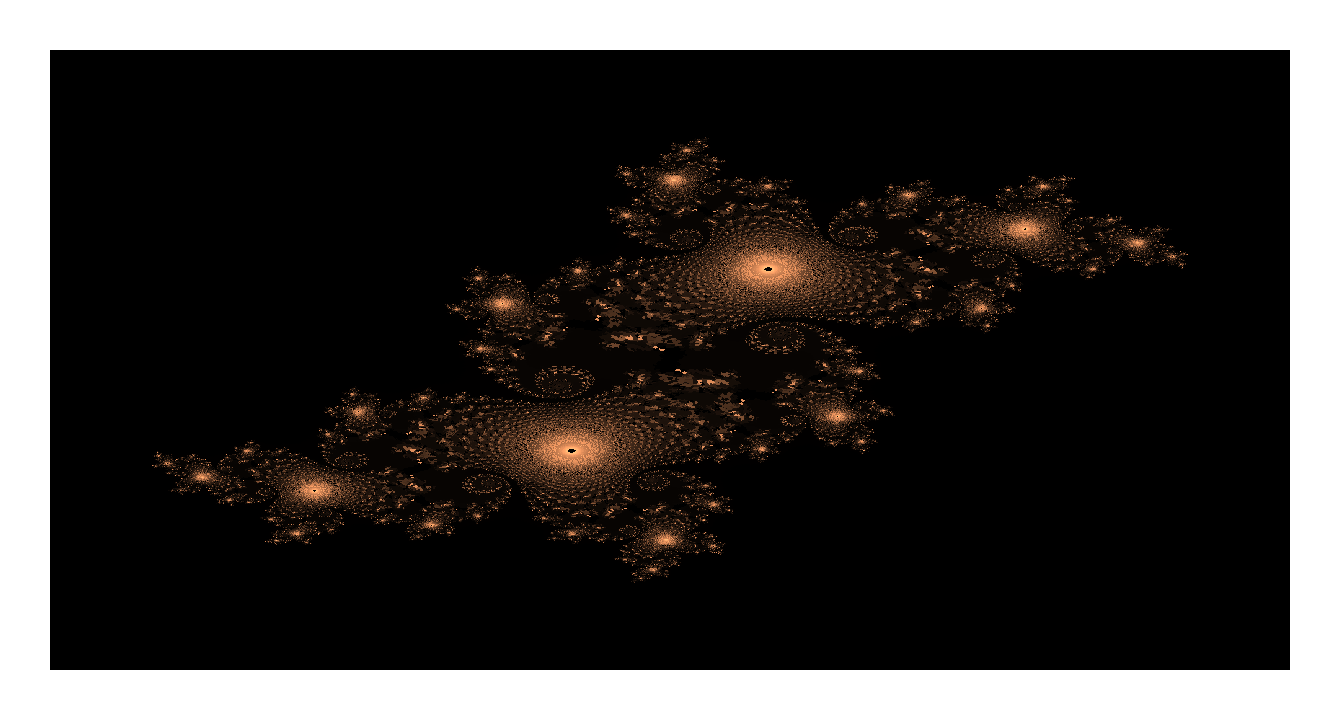

In [305]:
plt.figure(figsize=(3.200, 2.400), dpi=500)
img = plt.imshow(M.cpu().numpy(),interpolation='nearest')
img.set_cmap('copper')
#img.set_cmap('coolwarm')
plt.axis('off')
plt.savefig('julia_set1.png', dpi=1000,bbox_inches='tight',pad_inches = 0)

In [306]:
%time M = compute_Mandelbrot(c=complex(-0.8,0.156),thresh=4, xrange=[-1.5,1.5], yrange=[-1.5,1.5], w = 2000, h = 1000, maxiter = 10**4)

CPU times: user 7.2 s, sys: 3.07 s, total: 10.3 s
Wall time: 10.3 s


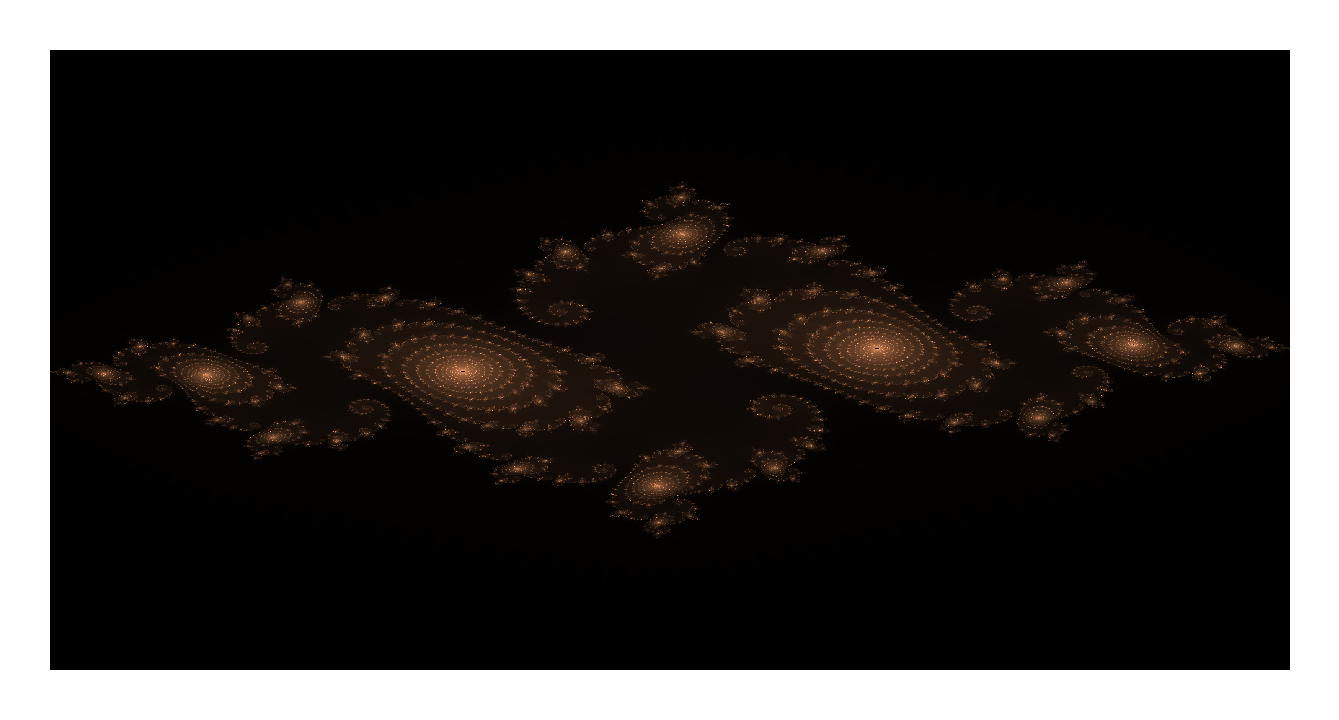

In [310]:
plt.figure(figsize=(3.200, 2.400), dpi=500)
img = plt.imshow(M.cpu().numpy(),interpolation='nearest')
img.set_cmap('copper')
plt.axis('off')
plt.savefig('julia_set2.png', dpi=1000,bbox_inches='tight',pad_inches = 0)

In [311]:
%time M = compute_Mandelbrot(c=complex(-0.75,0.11),thresh=10, xrange=[-1.5,1.5], yrange=[-1.5,1.5], w = 2000, h = 1000, maxiter = 10**4)

CPU times: user 7.39 s, sys: 2.92 s, total: 10.3 s
Wall time: 10.3 s


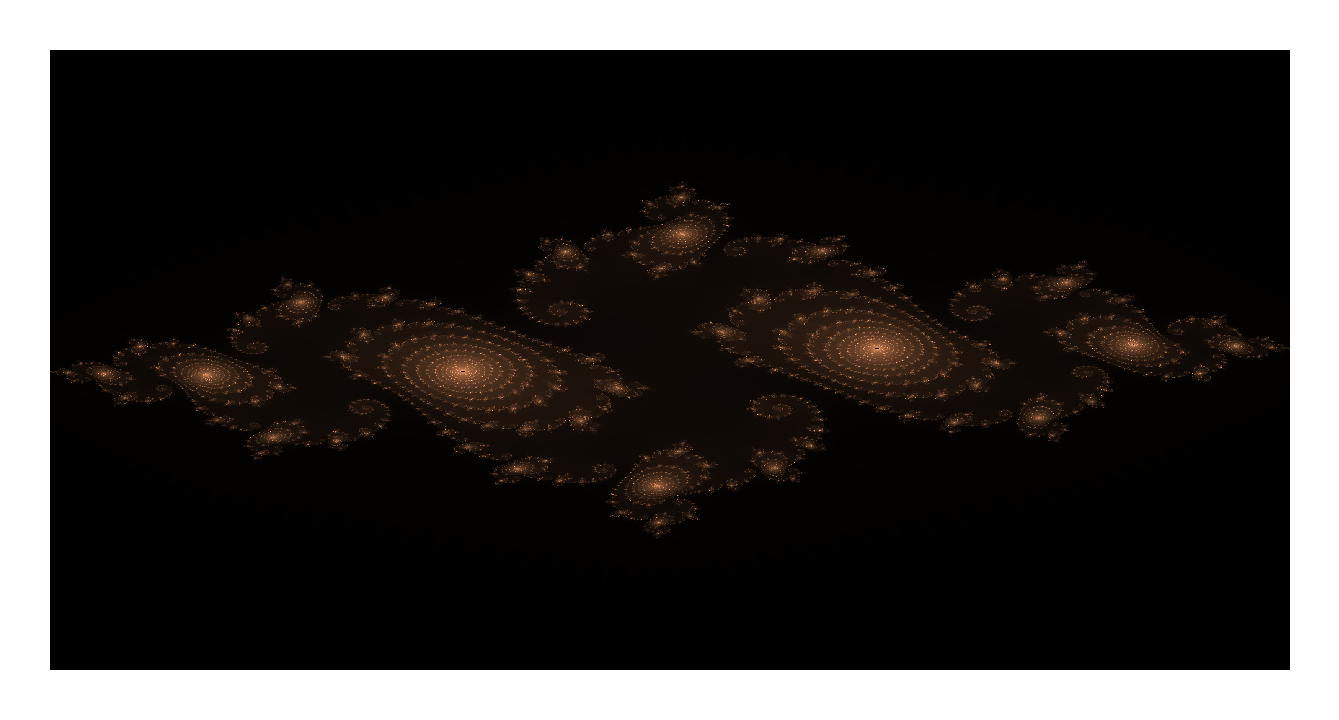

In [312]:
plt.figure(figsize=(3.200, 2.400), dpi=500)
img = plt.imshow(M.cpu().numpy(),interpolation='nearest')
img.set_cmap('copper')
#img.set_cmap('coolwarm')
plt.axis('off')
plt.savefig('julia_set3.png', dpi=1000,bbox_inches='tight',pad_inches = 0)